<a href="https://colab.research.google.com/github/laibashakir/PRODIGY_DataScience_Internship_Tasks/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**: Sentiment analysis in Social Media Data

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

data set link: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis




importing the necessary libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

extBlob is a Python library used for processing textual data. It provides a simple API for common natural language processing (NLP) tasks. it is commonly used for sentiment analysis tasks as well.

In [3]:
data = pd.read_csv('twitter_training.csv')

we will remove all the unneccessary columns

In [6]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# **Data Preprocessing**

In [7]:
df.shape

(74682, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [14]:
df.dropna(axis=0 , inplace=True)

In [15]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [ ]:
now we will remove the duplicates

In [16]:
df.duplicated().sum()

2340

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [31]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts


Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

# **Visualization**

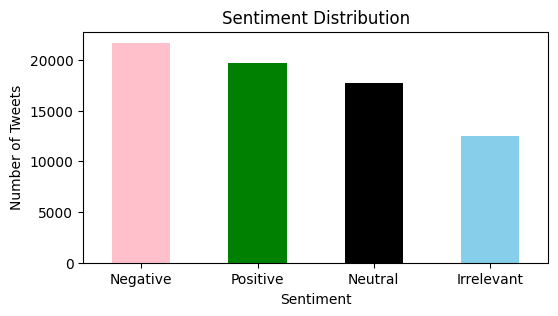

In [34]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['pink', 'green', 'black', 'skyblue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

based on data of specific entity


In [42]:
entity = df[df['Entity'].str.contains('LeagueOfLegends', case=False)]
sentiment_counts = entity['Sentiment'].value_counts()
sentiment_counts

Sentiment
Neutral       800
Negative      616
Positive      582
Irrelevant    298
Name: count, dtype: int64

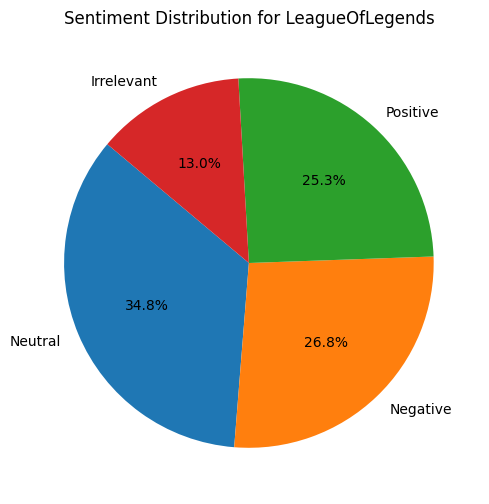

In [43]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels= sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for LeagueOfLegends')
plt.show()

so we can see that the there is almost equal ratio of positive and negative sentiments about the LeagueOfLegends